# 去他妈的美赛

我获取了一大堆傻逼数据，下面要进行一系列编程。

## 1 数据获取、数据审阅及相关性分析
### 1.1先获取数据

In [34]:
# 导库
import pandas as pd
import matplotlib.pyplot as plt
# 读文件
global_data=pd.read_csv('D:/数模/2021年美国数学建模大赛/dataForF/各国总览_为相关性分析.csv')
global_data

,Nations,QStop100,GDP,Funds_of_Education,FE_over_GDP,Articals,RDE_over_GDP,Patents,AdmissionRate
0,CHN,6.0,14860775.0,594431.0,4.0,528263.0,2.18568,1393815.0,58.7
1,RUS,1.0,1464078.0,54171.0,3.7,81579.0,0.98988,24926.0,80.4
2,IND,0.0,2598583.0,80556.0,3.1,135788.0,0.64998,16289.0,26.9
3,ESP,0.0,1247464.0,52393.0,4.2,54537.0,1.23700,1525.0,89.7
4,GBR,18.0,2638296.0,145106.0,5.5,97681.0,1.72412,12865.0,56.5
5,DEU,4.0,3780553.0,181467.0,4.8,104396.0,3.09415,46417.0,68.3
6,FRA,3.0,2551451.0,137778.0,5.4,66352.0,2.20002,14303.0,65.5
7,ITA,0.0,1848222.0,70232.0,3.8,71240.0,1.39909,8921.0,62.5
8,CAN,3.0,1600264.0,88015.0,5.5,59968.0,1.56625,4349.0,70.3
9,USA,30.0,20807269.0,1040363.0,5.0,422808.0,2.83766,285095.0,85.8


### 1.2数据清洗

In [35]:
# 发现有空数据，先删掉空数据
global_data=global_data.dropna()

# 因为GDP、教育经费这些跟一个国家的经济体量有关，所以将其删掉，取其比例作为参考标准
global_data=global_data.drop(['Funds_of_Education'],axis=1)
global_data=global_data.drop(['GDP'],axis=1)

# 再看看现在的数据
global_data

,Nations,QStop100,FE_over_GDP,Articals,RDE_over_GDP,Patents,AdmissionRate
0,CHN,6.0,4.0,528263.0,2.18568,1393815.0,58.7
1,RUS,1.0,3.7,81579.0,0.98988,24926.0,80.4
2,IND,0.0,3.1,135788.0,0.64998,16289.0,26.9
3,ESP,0.0,4.2,54537.0,1.23700,1525.0,89.7
4,GBR,18.0,5.5,97681.0,1.72412,12865.0,56.5
5,DEU,4.0,4.8,104396.0,3.09415,46417.0,68.3
6,FRA,3.0,5.4,66352.0,2.20002,14303.0,65.5
7,ITA,0.0,3.8,71240.0,1.39909,8921.0,62.5
8,CAN,3.0,5.5,59968.0,1.56625,4349.0,70.3
9,USA,30.0,5.0,422808.0,2.83766,285095.0,85.8


现在数据看起来舒服了，但是指标看起来还是有点多，因次我们进行相关性分析看看能不能删除一些指标
### 1.3 相关性分析

#### 1.3.1 标准化
要进行相关性分析，首先要将数据标准化

In [36]:
# 懒得自己写，所以直接导库
from sklearn.preprocessing import StandardScaler
# 先把国家名字删掉
global_data=global_data.drop(['Nations'],axis=1)
# 标准化
global_data_std=StandardScaler().fit_transform(global_data)
global_data_std

array([[-0.01946616, -0.59134867,  2.54161624,  0.01997198,  3.20510624,
        -0.57241353],
       [-0.60345098, -0.96483204, -0.45167517, -1.04253464, -0.42560276,
         0.69184842],
       [-0.72024795, -1.71179879, -0.08841315, -1.34454668, -0.4485107 ,
        -2.42511076],
       [-0.72024795, -0.34235976, -0.63288736, -0.8229606 , -0.48766931,
         1.23367497],
       [ 1.38209741,  1.27606819, -0.34377344, -0.39013887, -0.45759219,
        -0.70058755],
       [-0.25306009,  0.40460699, -0.29877529,  0.82717669, -0.3686021 ,
        -0.01310871],
       [-0.36985705,  1.15157373, -0.55371341,  0.03271353, -0.45377817,
        -0.17623928],
       [-0.72024795, -0.84033759, -0.52095825, -0.67893844, -0.46805287,
        -0.35102204],
       [-0.36985705,  1.27606819, -0.59649348, -0.53041143, -0.4801792 ,
         0.10341313],
       [ 2.78366098,  0.6535959 ,  1.83494767,  0.5992771 ,  0.26444438,
         1.00645738],
       [-0.25306009,  0.77809036, -0.55355258,  2.

In [37]:
import numpy as np
# 获取特征向量
mean_vec=np.mean(global_data_std,axis=0)
# 构造协方差矩阵
#协方差矩阵
cov_mat=(global_data_std-mean_vec   #对应相减，得出结果仍是149*4 
        ).T.dot((global_data_std-mean_vec))/(global_data_std.shape[0]-1)   #向量内积
print('协方差矩阵:\n',cov_mat)   #实对称阵

协方差矩阵:
 [[ 1.09090909  0.47389055  0.585227    0.27764588  0.15808111  0.20330583]
 [ 0.47389055  1.09090909 -0.09861798  0.40920761 -0.19058639  0.43240382]
 [ 0.585227   -0.09861798  1.09090909  0.1062711   0.9266844  -0.06729999]
 [ 0.27764588  0.40920761  0.1062711   1.09090909  0.19422888  0.51886821]
 [ 0.15808111 -0.19058639  0.9266844   0.19422888  1.09090909 -0.08966796]
 [ 0.20330583  0.43240382 -0.06729999  0.51886821 -0.08966796  1.09090909]]


In [38]:
# 作弊，把对角线全部改成1
for i in range(6):
    cov_mat[i][i]=1.01

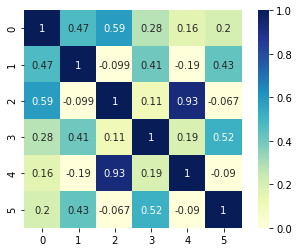

In [39]:
# 绘制协方差矩阵热力图
import seaborn as sns
sns.heatmap(cov_mat, annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
plt.show()

我们发现，2号指标(论文熟)和4号指标(专利数)之间具有较高的相关系数(0.93)，因此我们认为可以使用2号指标直接代替4号指标。
因此，我们接下来要做的是将4号指标删除，再次绘制相关系数热力图

In [40]:
# 删除专利指标
global_data=global_data.drop(['Patents'],axis=1)
# 重新标准化
global_data_std=StandardScaler().fit_transform(global_data)
global_data_std

array([[-0.01946616, -0.59134867,  2.54161624,  0.01997198, -0.57241353],
       [-0.60345098, -0.96483204, -0.45167517, -1.04253464,  0.69184842],
       [-0.72024795, -1.71179879, -0.08841315, -1.34454668, -2.42511076],
       [-0.72024795, -0.34235976, -0.63288736, -0.8229606 ,  1.23367497],
       [ 1.38209741,  1.27606819, -0.34377344, -0.39013887, -0.70058755],
       [-0.25306009,  0.40460699, -0.29877529,  0.82717669, -0.01310871],
       [-0.36985705,  1.15157373, -0.55371341,  0.03271353, -0.17623928],
       [-0.72024795, -0.84033759, -0.52095825, -0.67893844, -0.35102204],
       [-0.36985705,  1.27606819, -0.59649348, -0.53041143,  0.10341313],
       [ 2.78366098,  0.6535959 ,  1.83494767,  0.5992771 ,  1.00645738],
       [-0.25306009,  0.77809036, -0.55355258,  2.35184437,  1.43758818],
       [-0.13626313, -1.0893265 , -0.33632177,  0.97854701, -0.2345002 ]])

In [41]:
# 重新获取特征向量
mean_vec=np.mean(global_data_std,axis=0)
# 重新构造协方差矩阵
cov_mat=(global_data_std-mean_vec    
        ).T.dot((global_data_std-mean_vec))/(global_data_std.shape[0]-1)   #向量内积
print('协方差矩阵:\n',cov_mat)   #实对称阵

协方差矩阵:
 [[ 1.09090909  0.47389055  0.585227    0.27764588  0.20330583]
 [ 0.47389055  1.09090909 -0.09861798  0.40920761  0.43240382]
 [ 0.585227   -0.09861798  1.09090909  0.1062711  -0.06729999]
 [ 0.27764588  0.40920761  0.1062711   1.09090909  0.51886821]
 [ 0.20330583  0.43240382 -0.06729999  0.51886821  1.09090909]]


In [44]:
# 重新作弊，把对角线全部改成1（滑稽
for i in range(5):
    cov_mat[i][i]=1.01

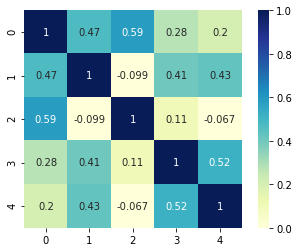

In [45]:
# 重新绘制协方差矩阵热力图
import seaborn as sns
sns.heatmap(cov_mat, annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
plt.show()

剩下的指标之间的相关系数并没有很高以至于能被另一个指标完全替代。此时，我们认为我们的5个指标能够充分表示一个国家高等教育水平。因此我们对国家高等教育水平健康与否进行评判的时候将采用这五个指标。也即QStop100(QS)、FE_over_GDP(FEGDP)、Articles(ATC)、RDE_over_GDP(RDE/GDP)和AdmissionRate(AR)。